In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [26]:
def f(image):
    image = np.array([image])
    return your_model.predict(image)

In [74]:
def make_gradcam_heatmap(img_array, model, pred_index=None, last_conv_layer_name='conv2d_5'):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    if img_array is not None:
        img_array = tf.convert_to_tensor(img_array)
    else:
        raise ValueError("Input image (img_array) is None")

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model.predict(img_array)

        # Check for None values in outputs (handle as needed)
        if last_conv_layer_output is None or preds is None:
            raise ValueError("Model prediction failed. Check your input or model.")

        # Ensure both outputs are tensors (if necessary)
        last_conv_layer_output = tf.convert_to_tensor(last_conv_layer_output)
        preds = tf.convert_to_tensor(preds)

        # Ensure both outputs are tensors (if necessary)
        last_conv_layer_output = tf.convert_to_tensor(last_conv_layer_output)
        preds = tf.convert_to_tensor(preds)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)
    print(type(grads))

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    
    return heatmap.numpy()

In [19]:
import os
import cv2
import numpy as np
from PIL import Image

def load_images_from_directory(root_dir, target_size=(128, 128)):
    images = []
    labels = []
    class_dirs = sorted(os.listdir(root_dir))
    for class_idx, class_dir in enumerate(class_dirs):
        class_path = os.path.join(root_dir, class_dir)
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, target_size)
            images.append(image)
            labels.append(class_idx)  # Assign label based on directory index
    return np.array(images), np.array(labels)

# Example usage
root_dir = './Training/'  # Replace this with your dataset directory
x_train, y_train = load_images_from_directory(root_dir)

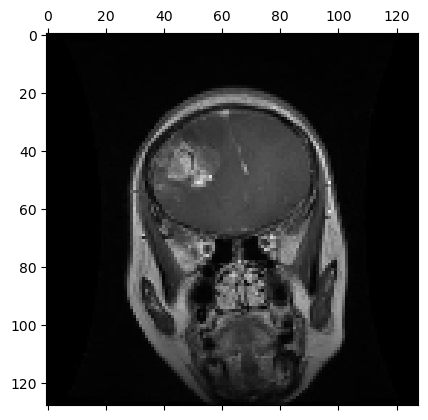

In [22]:
plt.matshow(x_train[0])

In [39]:
model = tf.keras.models.load_model('saved_models/model_1.keras')

In [30]:
your_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)      

In [75]:
image = x_train[0]
image = np.expand_dims(image, axis=0)
# img_array = tf.convert_to_tensor(image)
class_index = 0
output = make_gradcam_heatmap(image, model)

1/1 [==============================] - 0s 114ms/step
<class 'NoneType'>


ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [44]:
image.shape

(1, 128, 128, 3)

In [78]:
model.summary(show_trainable=True)

Model: "sequential_1"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         Y          
                                                                            
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       Y          
                                                                            
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         Y          
 g2D)                                                                       
                                                                            
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     Y          
                                                                            
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         Y          
 g2D)                                                 

In [80]:
def make_gradcam_heatmap(img_array, model, pred_index=None, last_conv_layer_name='conv2d_5'):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    if img_array is not None:
        img_array = tf.convert_to_tensor(img_array)
    else:
        raise ValueError("Input image (img_array) is None")

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model.predict(img_array)

        # Check for None values in outputs (handle as needed)
        if last_conv_layer_output is None or preds is None:
            raise ValueError("Model prediction failed. Check your input or model.")

        # Ensure both outputs are tensors (if necessary)
        last_conv_layer_output = tf.convert_to_tensor(last_conv_layer_output)
        preds = tf.convert_to_tensor(preds)

        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    if grads is None:
        raise ValueError("Gradient computation failed. Check your input or model.")

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    
    return heatmap.numpy()

# Usage example
image = x_train[0]
image = np.expand_dims(image, axis=0)
class_index = 0
output = make_gradcam_heatmap(image, model)

1/1 [==============================] - 0s 120ms/step


ValueError: Gradient computation failed. Check your input or model.